In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv(
    "SaaS-Sales.csv"
)
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [48]:
print(df)

      Row ID          Order ID  Order Date  Date Key       Contact Name  \
0          1  EMEA-2022-152156   11/9/2022  20221109        Nathan Bell   
1          2  EMEA-2022-152156   11/9/2022  20221109        Nathan Bell   
2          3  AMER-2022-138688   6/13/2022  20220613     Deirdre Bailey   
3          4  EMEA-2021-108966  10/11/2021  20211011         Zoe Hodges   
4          5  EMEA-2021-108966  10/11/2021  20211011         Zoe Hodges   
...      ...               ...         ...       ...                ...   
9989    9990  EMEA-2020-110422   1/22/2020  20200122          Dan Allan   
9990    9991  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   
9991    9992  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   
9992    9993  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   
9993    9994  AMER-2023-119914    5/5/2023  20230505   Jasmine Springer   

            Country           City Region Subregion           Customer  \
0           Ireland      

In [49]:
print(df.dtypes)

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


Kode Pembersihan Data

In [50]:
df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Date Key        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [51]:
#Konversi Kolom ke Format yang Sesuai 
#Mengonversi data pada kolom Order Date ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
#Mengonversi data pada kolom Sales ke numerik
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
#Mengonversi data pada kolom Profit ke numerik
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
#Mengonversi data pada kolom Discount ke numerik
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

In [52]:
print(df.dtypes)

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object


In [53]:
#Memeriksa Duplikat
print("Jumlah duplikat: ", df.duplicated().sum())

#Hapus duplikat jika ada
df = df.drop_duplicates()

Jumlah duplikat:  0


Menangani Outlier

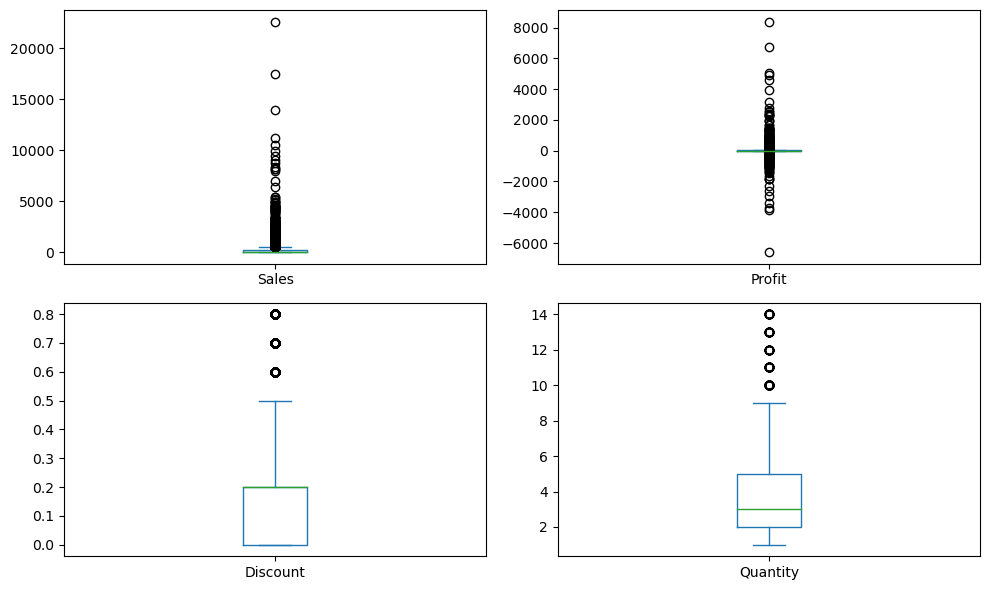

In [54]:
#Deteksi Outlier dengan Boxplot
numerical_columns = ['Sales', 'Profit', 'Discount', 'Quantity']
df[numerical_columns].plot(kind='box', subplots=True, layout=(2,2), figsize=(10, 6), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [55]:
#Deteksi Outlir dengan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 - 1.5 * IQR

    #Menandai outlier
    outliers =  df[(df[column] < lower_bound) | (df[column] < upper_bound)]
    non_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outliers, non_outliers, lower_bound, upper_bound

In [56]:
outliers_sales = detect_outliers_iqr(df, 'Sales')
print("Outlier di kolom 'Sales': ", outliers_sales)

Outlier di kolom 'Sales':  (Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: [], Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: [], -271.71000000000004, -271.71000000000004)


In [57]:
outliers_profit = detect_outliers_iqr(df, 'Profit')
print("Outlier di kolom 'Profit': ", outliers_profit)

Outlier di kolom 'Profit':  (      Row ID          Order ID Order Date  Date Key      Contact Name  \
3          4  EMEA-2021-108966 2021-10-11  20211011        Zoe Hodges   
14        15   APJ-2021-118983 2021-11-22  20211122    Emily Morrison   
27        28  EMEA-2021-150630 2021-09-17  20210917         Neil Gill   
36        37   APJ-2022-117590 2022-12-09  20221209       Chloe Short   
38        39   APJ-2021-117415 2021-12-27  20211227  Jasmine Metcalfe   
...      ...               ...        ...       ...               ...   
9899    9900  AMER-2020-117380 2020-03-28  20200328   Alexandra Sharp   
9912    9913  AMER-2021-132388 2021-10-10  20211010      Brandon Kerr   
9919    9920   APJ-2022-149272 2022-03-16  20220316     Pippa Edmunds   
9931    9932  AMER-2021-104948 2021-11-13  20211113   Kimberly Newman   
9962    9963   APJ-2021-168088 2021-03-19  20210319    Harry Buckland   

            Country         City Region Subregion                 Customer  \
3           Germ

In [58]:
outliers_discount = detect_outliers_iqr(df, 'Discount')
print("Outlier di kolom 'Discount': ", outliers_discount)

Outlier di kolom 'Discount':  (Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: [], Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: [], -0.30000000000000004, -0.30000000000000004)


In [59]:
outliers_quantity = detect_outliers_iqr(df, 'Quantity')
print("Outlier di kolom 'Quantity': ", outliers_quantity)

Outlier di kolom 'Quantity':  (Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: [], Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: [], -2.5, -2.5)


In [60]:
#Deteksi outlier di kolom Profit
outliers_profit, non_outliers_profit, lower_profit, upper_profit = detect_outliers_iqr(df, 'Profit')

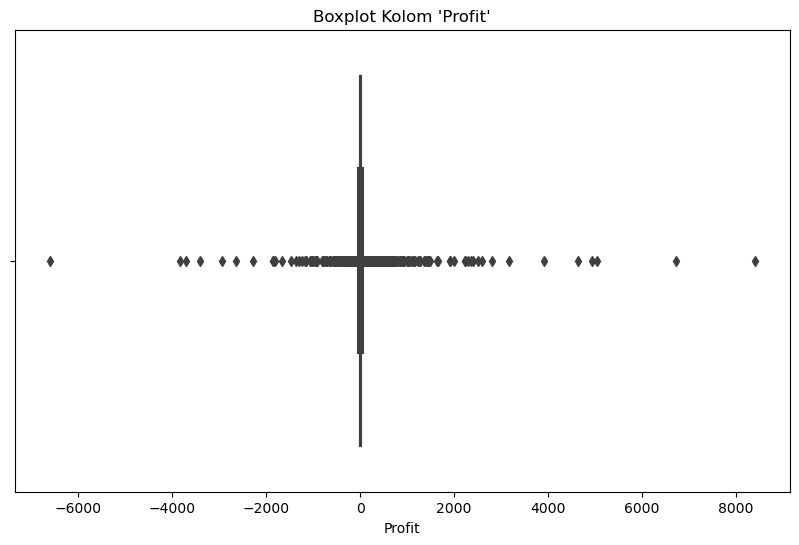

In [61]:
# Visualisasi distribusi Profit
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profit')
plt.title("Boxplot Kolom 'Profit'")
plt.show()

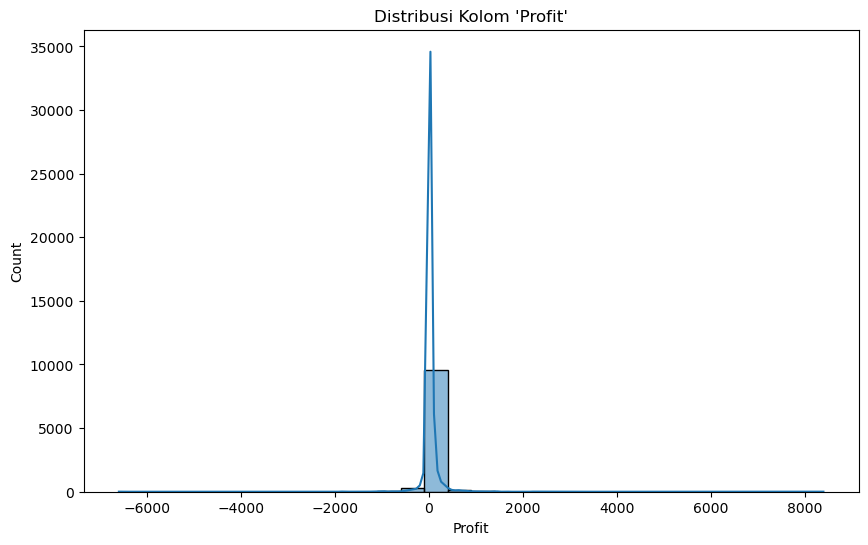

In [62]:
# Visualisasi histogram Profit
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Profit', kde=True, bins=30)
plt.title("Distribusi Kolom 'Profit'")
plt.show()

In [63]:
#Mendeteksi Outlier
def detect_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR

    # Menghapus outlier
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


In [64]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'Profit')

In [65]:
df = remove_outliers_iqr(df, 'Sales')
df = remove_outliers_iqr(df, 'Quantity')
df = remove_outliers_iqr(df, 'Discount')

In [66]:
# Cek persentase missing values
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64


In [67]:
# Simpan dataset yang sudah dibersihkan
cleaned_file_path = 'cleaned_data_SaaS_Sales.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Data bersih disimpan di {cleaned_file_path}")

Data bersih disimpan di cleaned_data_SaaS_Sales.csv


In [68]:
df = pd.read_csv(
    "cleaned_data_SaaS_Sales.csv"
)
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714
1,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368,2,0.2,2.5164
2,6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.860,7,0.0,14.1694
3,7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.280,4,0.0,1.9656
4,9,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.504,3,0.2,5.7825


Visualisasi Data

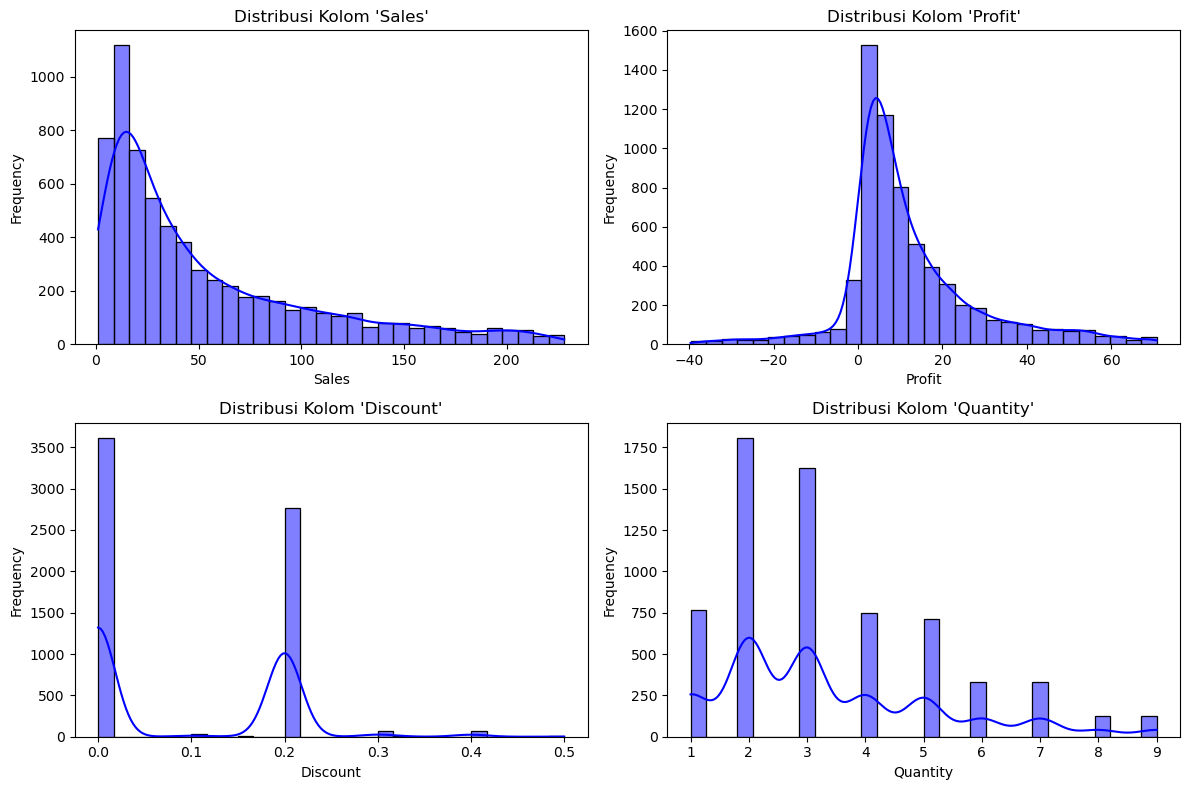

In [69]:
# Membuat histogram untuk setiap kolom numerik
plt.figure(figsize=(12, 8))  # Ukuran figure global
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Membuat grid 2x2 untuk 4 histogram
    sns.histplot(data=df, x=column, kde=True, bins=30, color='blue')
    plt.title(f"Distribusi Kolom '{column}'")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

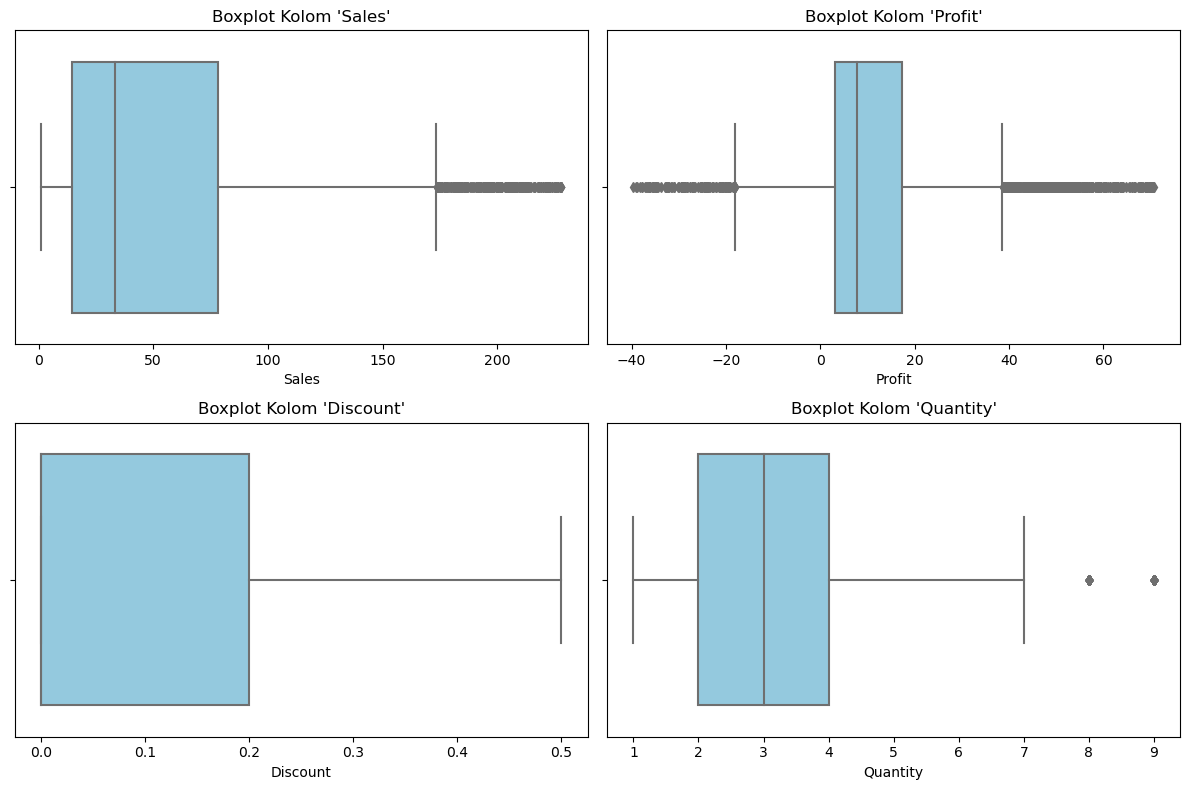

In [70]:
# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, 8))  # Ukuran figure global
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Membuat grid 2x2 untuk 4 boxplot
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f"Boxplot Kolom '{column}'")
    plt.xlabel(column)

plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

In [71]:
missing_values = df[['Country', 'Region', 'Subregion']].isnull().sum()

In [72]:
# Cek nilai unik di setiap kolom untuk melihat apakah ada data yang tidak sesuai format atau aneh
unique_country_values = df['Country'].unique()
unique_region_values = df['Region'].unique()
unique_subregion_values = df['Subregion'].unique()

# Print hasil pengecekan
print("Missing Values:\n", missing_values)
print("\nUnique Country Values:\n", unique_country_values)
print("\nUnique Region Values:\n", unique_region_values)
print("\nUnique Subregion Values:\n", unique_subregion_values)

Missing Values:
 Country      0
Region       0
Subregion    0
dtype: int64

Unique Country Values:
 ['United States' 'Germany' 'Sweden' 'Turkey' 'Costa Rica' 'France' 'Japan'
 'Australia' 'Luxembourg' 'Brazil' 'Philippines' 'India' 'United Kingdom'
 'Chile' 'Spain' 'South Africa' 'Portugal' 'Russia' 'Netherlands' 'Mexico'
 'Italy' 'Canada' 'Singapore' 'New Zealand' 'Czech Republic'
 'Saudi Arabia' 'Argentina' 'Belgium' 'South Korea' 'Finland' 'Israel'
 'Norway' 'Ireland' 'United Arab Emirates' 'Poland' 'Ukraine' 'Greece'
 'China' 'Austria' 'Indonesia' 'Colombia' 'Egypt' 'Denmark' 'Croatia'
 'Taiwan' 'Qatar' 'Iceland']

Unique Region Values:
 ['AMER' 'EMEA' 'APJ']

Unique Subregion Values:
 ['NAMER' 'EU-WEST' 'NOR' 'MEA' 'LATAM' 'JAPN' 'ANZ' 'APAC' 'IND' 'UKIR'
 'EU-EAST' 'EU']


In [73]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
import plotly.express as px

In [75]:
# Agregasi data berdasarkan Country
sales_by_country = df.groupby('Country', as_index=False)['Sales'].sum()

In [76]:
# Choropleth Map untuk visualisasi penjualan berdasarkan Country
fig = px.choropleth(
    sales_by_country,
    locations='Country',          # Kolom dengan nama negara
    locationmode='country names', # Mode lokasi sesuai nama negara
    color='Sales',                # Kolom yang divisualisasikan
    color_continuous_scale='Viridis',  # Skema warna
    title='Penjualan Berdasarkan Negara (Sales)',
    labels={'Sales': 'Total Sales'}
)


In [77]:
# Update layout
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

# Tampilkan peta
fig.show()

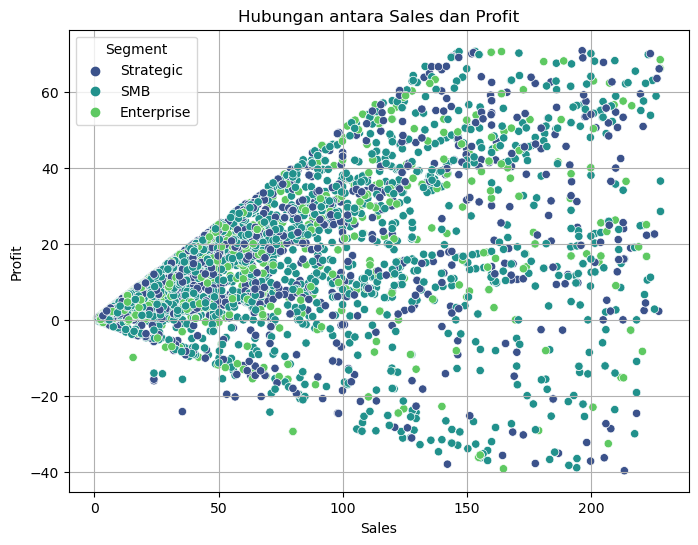

In [78]:
# Scatter plot untuk melihat hubungan antara sales dan profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment', palette='viridis')
plt.title('Hubungan antara Sales dan Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning:

Ignoring `palette` because no

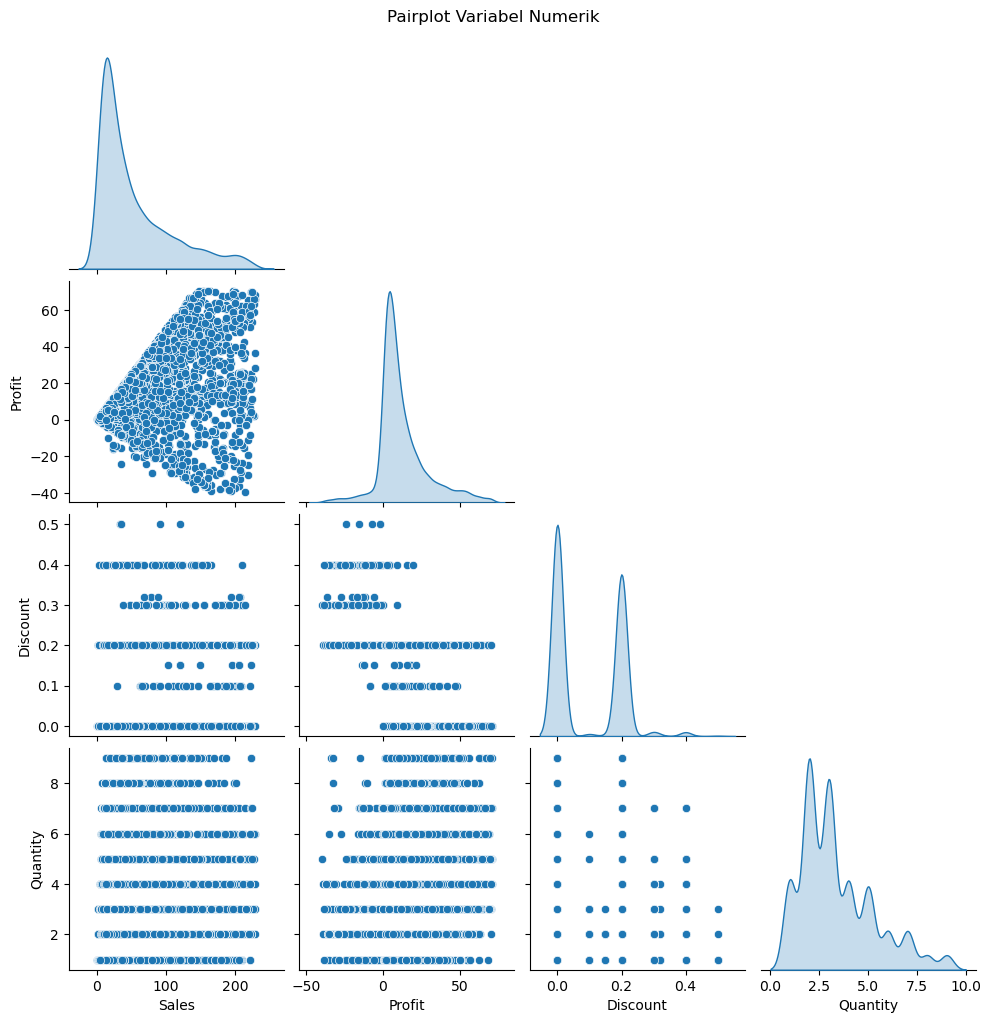

In [79]:
# Pairplot untuk variabel numerik
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

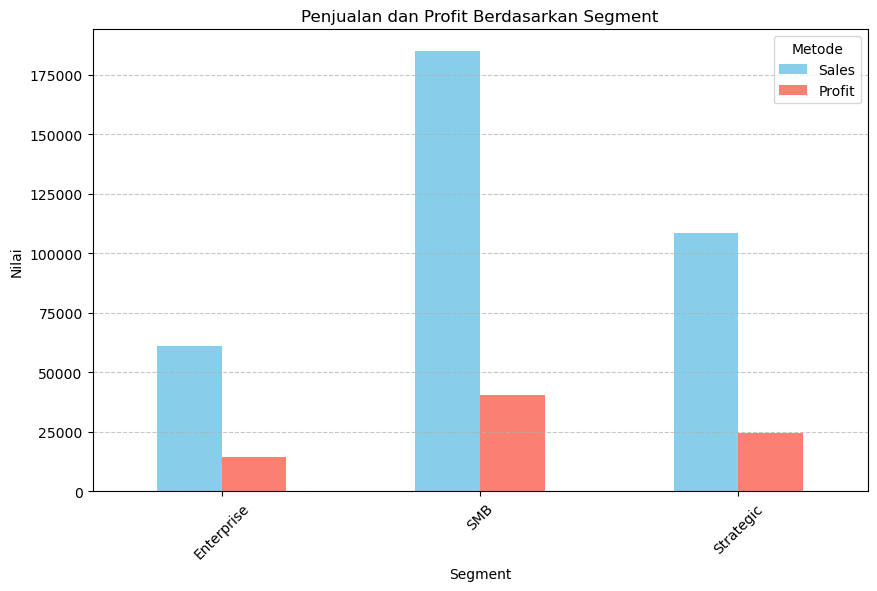

In [80]:
#Bar Chart untuk Visualisasi data Sales dan Profit berdasarkan kategori
# Agregasi data
sales_profit_by_segment = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Bar chart
sales_profit_by_segment.plot(
    kind='bar',
    x='Segment',
    figsize=(10, 6),
    color=['skyblue', 'salmon']
)
plt.title('Penjualan dan Profit Berdasarkan Segment')
plt.xlabel('Segment')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.legend(title='Metode')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

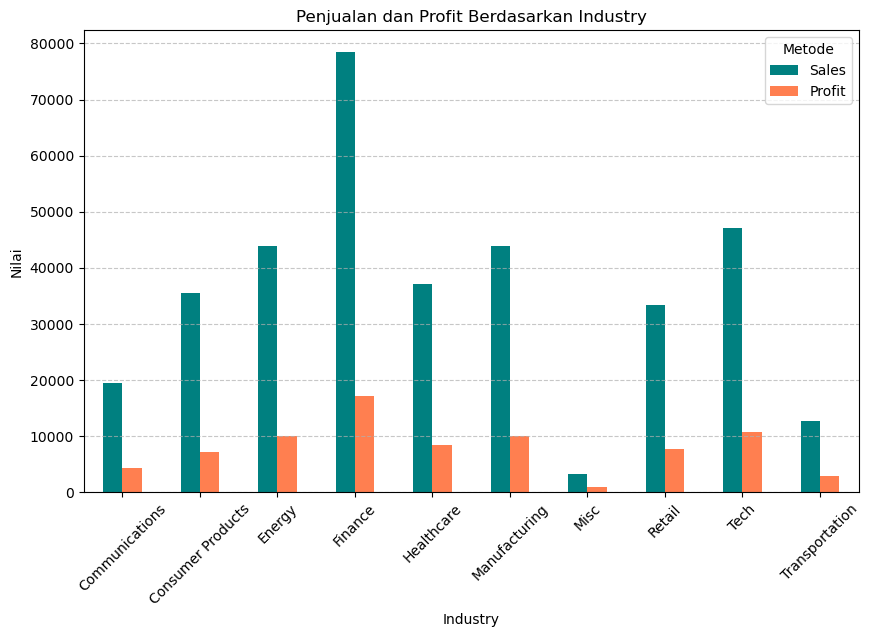

In [81]:
# Agregasi data
sales_profit_by_industry = df.groupby('Industry')[['Sales', 'Profit']].sum().reset_index()

# Bar chart
sales_profit_by_industry.plot(
    kind='bar',
    x='Industry',
    figsize=(10, 6),
    color=['teal', 'coral']
)
plt.title('Penjualan dan Profit Berdasarkan Industry')
plt.xlabel('Industry')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.legend(title='Metode')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

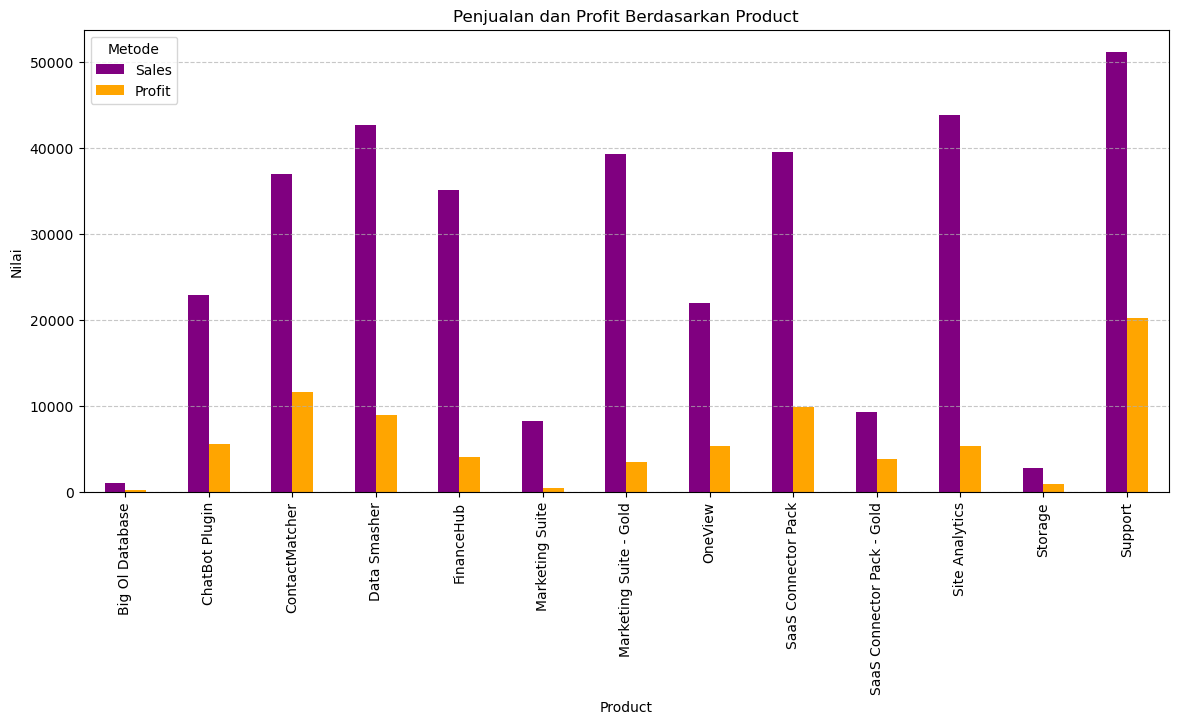

In [82]:
# Agregasi data
sales_profit_by_product = df.groupby('Product')[['Sales', 'Profit']].sum().reset_index()

# Bar chart
sales_profit_by_product.plot(
    kind='bar',
    x='Product',
    figsize=(14, 6),
    color=['purple', 'orange']
)
plt.title('Penjualan dan Profit Berdasarkan Product')
plt.xlabel('Product')
plt.ylabel('Nilai')
plt.xticks(rotation=90)
plt.legend(title='Metode')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

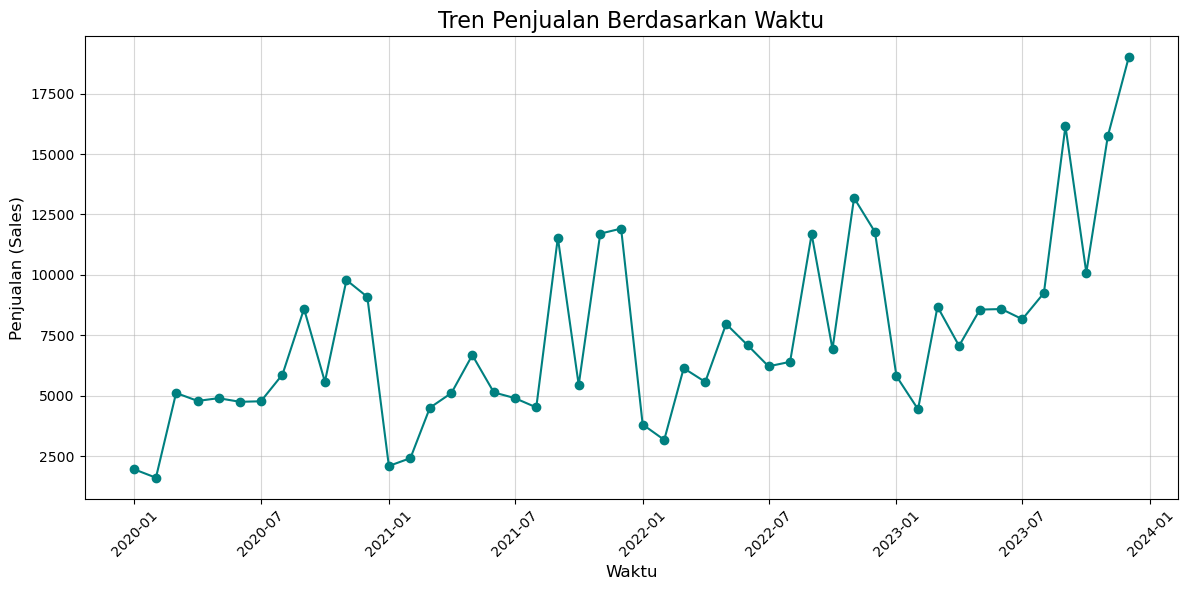

In [83]:
#Visualisasi data Tren Penjualan berdasarkan Waktu
# Konversi kolom 'Order Date' ke format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agregasi data berdasarkan waktu (bulanan)
sales_trend = df.groupby(df['Order Date'].dt.to_period('M')).agg({'Sales': 'sum'}).reset_index()
sales_trend['Order Date'] = sales_trend['Order Date'].dt.to_timestamp()

# Plot tren penjualan
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Order Date'], sales_trend['Sales'], marker='o', linestyle='-', color='teal')
plt.title('Tren Penjualan Berdasarkan Waktu', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Penjualan (Sales)', fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

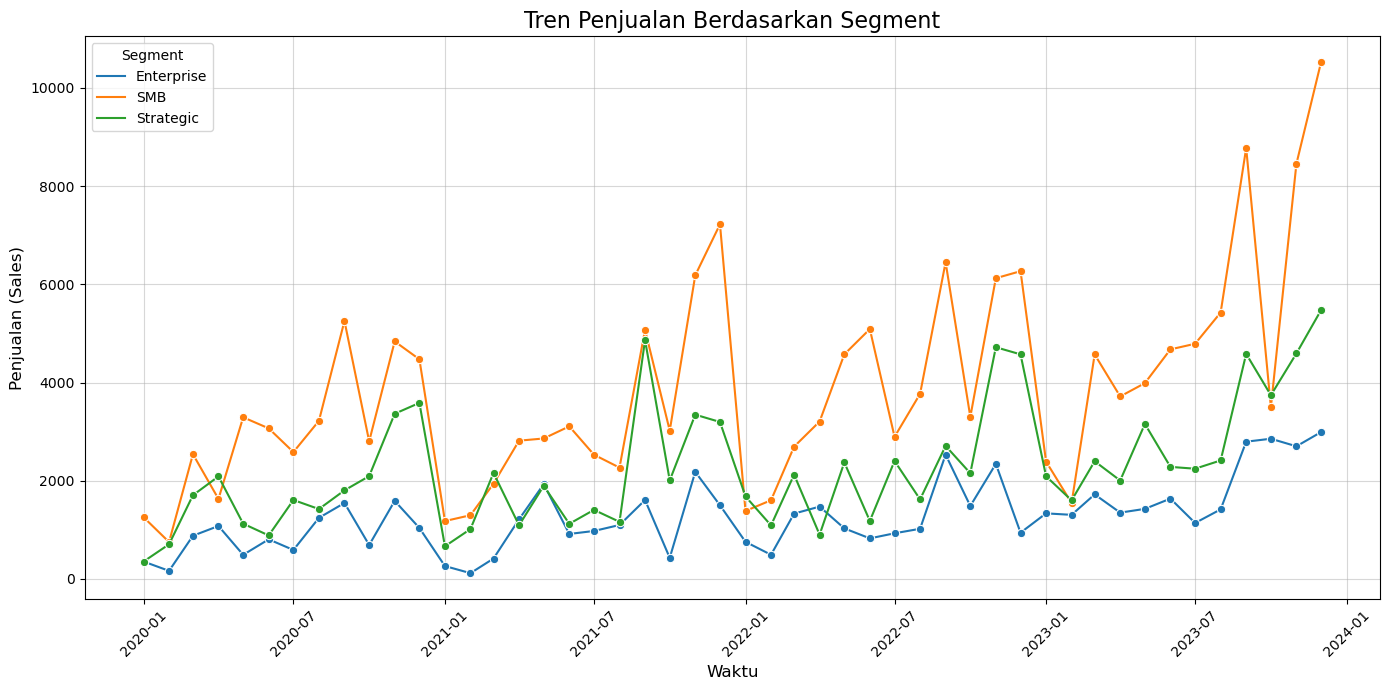

In [84]:
#Tren penlualan berdasarkan kategori
sales_trend_by_segment = df.groupby([df['Order Date'].dt.to_period('M'), 'Segment']).agg({'Sales': 'sum'}).reset_index()
sales_trend_by_segment['Order Date'] = sales_trend_by_segment['Order Date'].dt.to_timestamp()

# Visualisasi dengan Seaborn
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trend_by_segment, x='Order Date', y='Sales', hue='Segment', marker='o')
plt.title('Tren Penjualan Berdasarkan Segment', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Penjualan (Sales)', fontsize=12)
plt.legend(title='Segment')
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisis Data

Anaisis Deskriptif

In [93]:
#Rata-rata
mean_values = df[numerical_columns].mean()
# Median
median_values = df[numerical_columns].median()
# Modus
mode_values = df[numerical_columns].mode().iloc[0]
# Maksimum
max_values = df[numerical_columns].max()
# Minimum
min_values = df[numerical_columns].min()

In [94]:
# Menampilkan hasil
print("Rata-rata:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nModus:\n", mode_values)
print("\nMaksimum:\n", max_values)
print("\nMinimum:\n", min_values)

Rata-rata:
 Sales       53.937216
Profit      12.092693
Discount     0.092819
Quantity     3.382568
dtype: float64

Median:
 Sales       33.1100
Profit       7.7679
Discount     0.0000
Quantity     3.0000
dtype: float64

Modus:
 Sales       12.9600
Profit       6.2208
Discount     0.0000
Quantity     2.0000
Name: 0, dtype: float64

Maksimum:
 Sales       227.976
Profit       70.722
Discount      0.500
Quantity      9.000
dtype: float64

Minimum:
 Sales        0.990
Profit     -39.637
Discount     0.000
Quantity     1.000
dtype: float64


In [96]:
# Rata-rata penjualan per Segment
avg_sales_by_segment = df.groupby('Segment')['Sales'].mean()

# Menampilkan hasil
print("Rata-rata Penjualan per Segment:\n", avg_sales_by_segment)

Rata-rata Penjualan per Segment:
 Segment
Enterprise    51.680925
SMB           54.126192
Strategic     54.955217
Name: Sales, dtype: float64


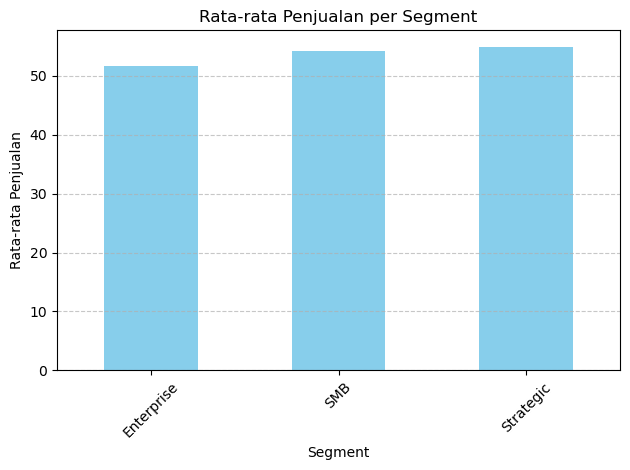

In [98]:
avg_sales_by_segment.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penjualan per Segment')
plt.xlabel('Segment')
plt.ylabel('Rata-rata Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [97]:
# Total penjualan per Industry
sales_by_industry = df.groupby('Industry')['Sales'].sum()

# Industri dengan kontribusi terbesar
top_industry = sales_by_industry.idxmax()
top_sales = sales_by_industry.max()

# Menampilkan hasil
print("Total Penjualan per Industry:\n", sales_by_industry)
print(f"\nIndustri dengan kontribusi terbesar terhadap penjualan: {top_industry} ({top_sales})")


Total Penjualan per Industry:
 Industry
Communications       19398.0280
Consumer Products    35563.7860
Energy               43845.9086
Finance              78418.5584
Healthcare           37052.8820
Manufacturing        43977.4114
Misc                  3231.5470
Retail               33412.8550
Tech                 47042.8570
Transportation       12639.4220
Name: Sales, dtype: float64

Industri dengan kontribusi terbesar terhadap penjualan: Finance (78418.5584)


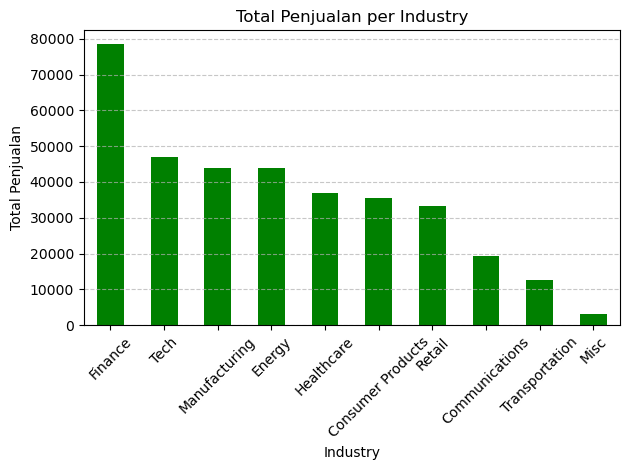

In [100]:
sales_by_industry.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Total Penjualan per Industry')
plt.xlabel('Industry')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Analisis Korelasi Menggunakan Heatmap

In [101]:
# Menghitung matriks korelasi
correlation_matrix = df[numerical_columns].corr()

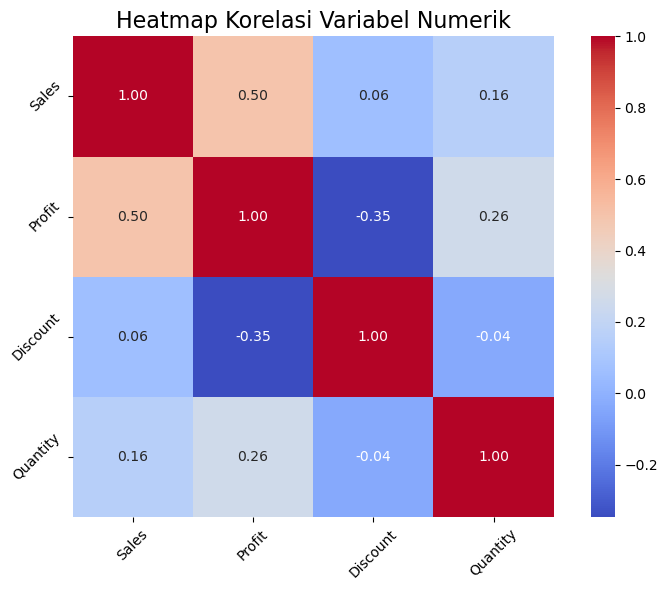

In [102]:
# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap Korelasi Variabel Numerik', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Analisis Wilayah

In [104]:
# Analisis berdasarkan Region
region_performance = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
top_region_sales = region_performance.loc[region_performance['Sales'].idxmax()]
top_region_profit = region_performance.loc[region_performance['Profit'].idxmax()]

# Analisis berdasarkan Country
country_performance = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
top_country_sales = country_performance.loc[country_performance['Sales'].idxmax()]
top_country_profit = country_performance.loc[country_performance['Profit'].idxmax()]

# Analisis berdasarkan City
city_performance = df.groupby('City').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
top_city_sales = city_performance.loc[city_performance['Sales'].idxmax()]
top_city_profit = city_performance.loc[city_performance['Profit'].idxmax()]

In [105]:
# Menampilkan hasil
print("=== Performa Berdasarkan Region ===")
print(region_performance)
print(f"\nRegion dengan penjualan tertinggi: {top_region_sales['Region']} (Sales: {top_region_sales['Sales']})")
print(f"Region dengan profit tertinggi: {top_region_profit['Region']} (Profit: {top_region_profit['Profit']})")

print("\n=== Performa Berdasarkan Country ===")
print(country_performance)
print(f"\nCountry dengan penjualan tertinggi: {top_country_sales['Country']} (Sales: {top_country_sales['Sales']})")
print(f"Country dengan profit tertinggi: {top_country_profit['Country']} (Profit: {top_country_profit['Profit']})")

print("\n=== Performa Berdasarkan City ===")
print(city_performance)
print(f"\nCity dengan penjualan tertinggi: {top_city_sales['City']} (Sales: {top_city_sales['Sales']})")
print(f"City dengan profit tertinggi: {top_city_profit['City']} (Profit: {top_city_profit['Profit']})")

=== Performa Berdasarkan Region ===
  Region        Sales      Profit
0   AMER  142013.2930  33183.8976
1    APJ   64263.2554  12051.9825
2   EMEA  148306.7070  34261.4838

Region dengan penjualan tertinggi: EMEA (Sales: 148306.707)
Region dengan profit tertinggi: EMEA (Profit: 34261.4838)

=== Performa Berdasarkan Country ===
                 Country       Sales      Profit
0              Argentina   5146.3060   1538.4862
1              Australia  11724.2950   1152.6312
2                Austria    217.5700     94.1444
3                Belgium   4108.6640    608.3350
4                 Brazil  11057.2770   3434.9579
5                 Canada  20570.4580   5127.8364
6                  Chile   7598.4930   1001.6069
7                  China   4340.0800   1456.3278
8               Colombia   1630.7000    543.4963
9             Costa Rica   1312.8500    445.5104
10               Croatia    509.2700    149.8321
11        Czech Republic   1481.3400    456.2881
12               Denmark    317.52

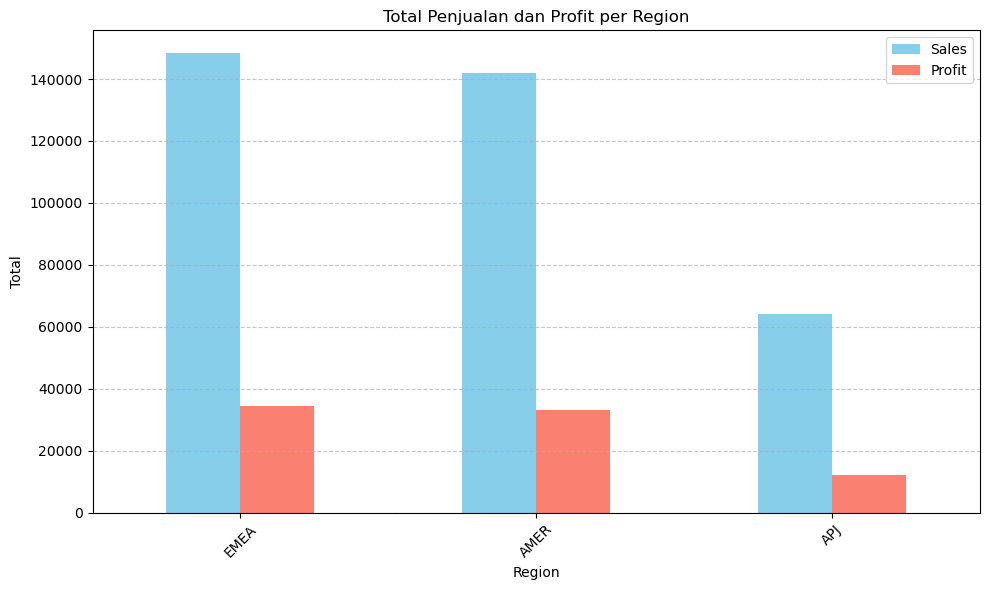

In [107]:
# Visualisasi
region_performance.sort_values('Sales', ascending=False).plot(
    x='Region', y=['Sales', 'Profit'], kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Total Penjualan dan Profit per Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

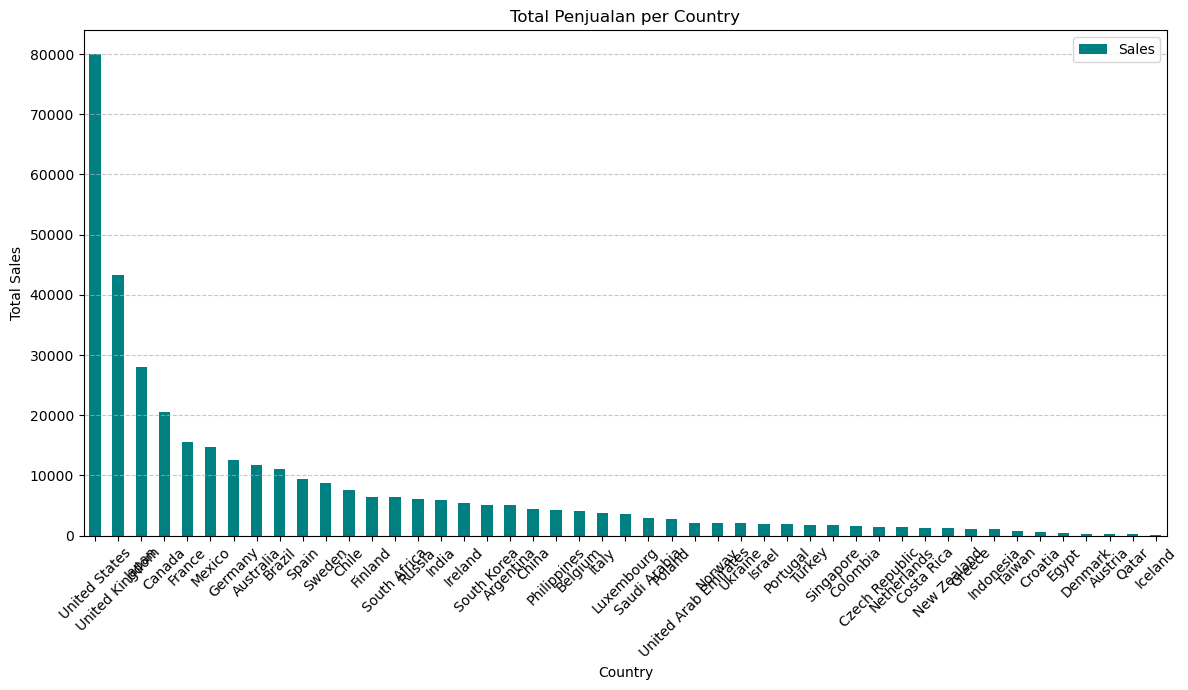

In [108]:
country_performance.sort_values('Sales', ascending=False).plot(
    x='Country', y='Sales', kind='bar', figsize=(12, 7), color='teal')
plt.title('Total Penjualan per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Segmentasi Pelanggan

In [109]:
# Agregasi data berdasarkan Customer atau Customer ID
customer_performance = df.groupby(['Customer', 'Customer ID']).agg(
    total_sales=('Sales', 'sum'),
    total_quantity=('Quantity', 'sum'),
    avg_sales=('Sales', 'mean'),
    total_orders=('Order ID', 'count'),
    avg_discount=('Discount', 'mean')
).reset_index()


In [110]:
# Identifikasi pelanggan dengan kontribusi terbesar
top_customer_sales = customer_performance.loc[customer_performance['total_sales'].idxmax()]
top_customer_orders = customer_performance.loc[customer_performance['total_orders'].idxmax()]

In [111]:
# Menampilkan hasil analisis
print("=== Performa Pelanggan ===")
print(customer_performance.sort_values('total_sales', ascending=False).head(10))

print(f"\nPelanggan dengan kontribusi penjualan terbesar:")
print(f"Nama: {top_customer_sales['Customer']}, ID: {top_customer_sales['Customer ID']}")
print(f"Total Penjualan: {top_customer_sales['total_sales']}, Rata-rata Penjualan: {top_customer_sales['avg_sales']}")

print(f"\nPelanggan dengan jumlah pesanan terbesar:")
print(f"Nama: {top_customer_orders['Customer']}, ID: {top_customer_orders['Customer ID']}")
print(f"Total Pesanan: {top_customer_orders['total_orders']}, Total Penjualan: {top_customer_orders['total_sales']}")

=== Performa Pelanggan ===
                  Customer  Customer ID  total_sales  total_quantity  \
4                  Allianz         1080    7061.2290             428   
76    Prudential Financial         1078    6493.5500             350   
38              Ford Motor         1009    6464.6144             416   
62  Mondelez International         1067    6073.7478             361   
80                 Siemens         1043    6067.2180             382   
30          ConocoPhillips         1024    6045.6436             337   
89             Tyson Foods         1088    5757.9532             426   
51                  Itochu         1032    5584.2140             285   
53       Johnson & Johnson         1055    5473.3380             297   
8         American Express         1005    5339.4900             308   

    avg_sales  total_orders  avg_discount  
4   54.738209           129      0.099225  
76  60.125463           108      0.080556  
38  54.784868           118      0.079831  
62  

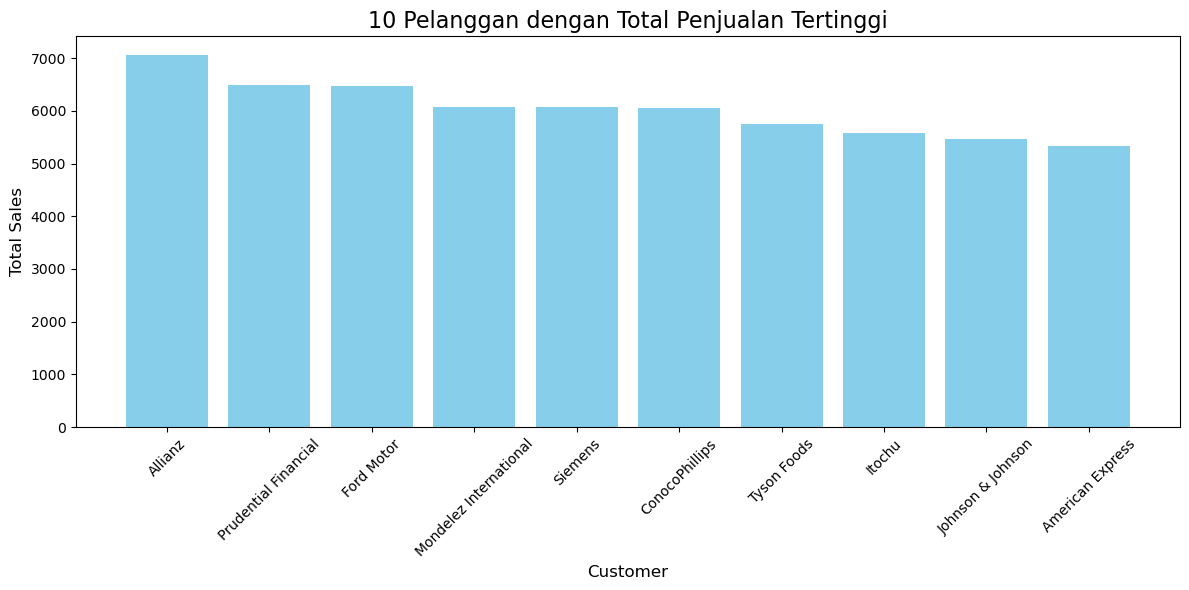

In [113]:
# Visualisasi total penjualan 10 pelanggan terbesar
top_customers = customer_performance.sort_values('total_sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_customers['Customer'], top_customers['total_sales'], color='skyblue')
plt.title('10 Pelanggan dengan Total Penjualan Tertinggi', fontsize=16)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

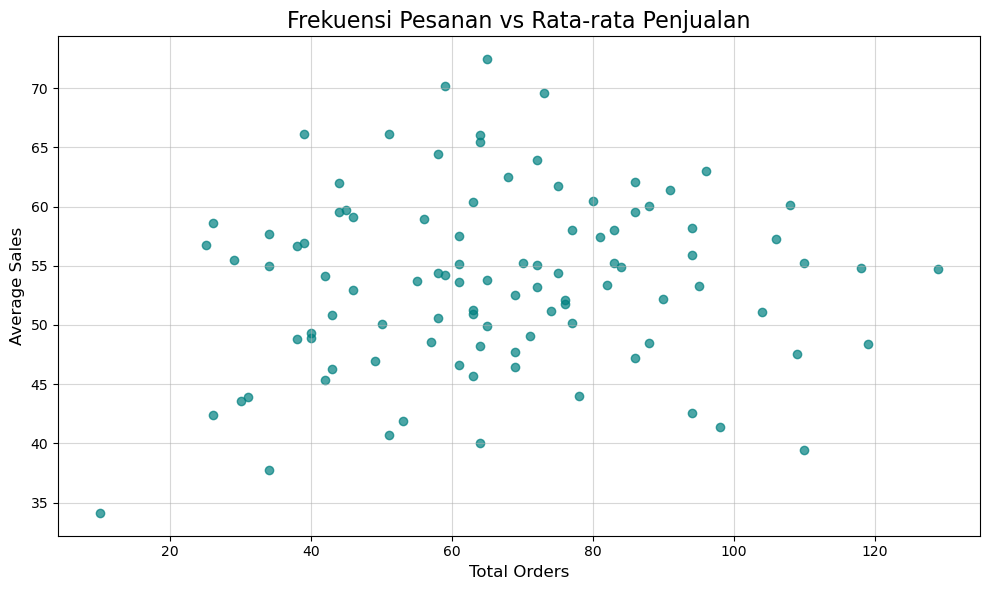

In [114]:
# Scatter plot frekuensi pesanan dan rata-rata penjualan
plt.figure(figsize=(10, 6))
plt.scatter(customer_performance['total_orders'], customer_performance['avg_sales'], alpha=0.7, color='teal')
plt.title('Frekuensi Pesanan vs Rata-rata Penjualan', fontsize=16)
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Analisis Hipotesis memberi Diskon meningkatkan Penjualan dan Profit

In [116]:
# 1. Menghitung korelasi antara Discount, Sales, dan Profit
correlation_discount_sales = df['Discount'].corr(df['Sales'])
correlation_discount_profit = df['Discount'].corr(df['Profit'])

# Menampilkan hasil korelasi
print(f"Korelasi antara Discount dan Sales: {correlation_discount_sales:.2f}")
print(f"Korelasi antara Discount dan Profit: {correlation_discount_profit:.2f}")

Korelasi antara Discount dan Sales: 0.06
Korelasi antara Discount dan Profit: -0.35


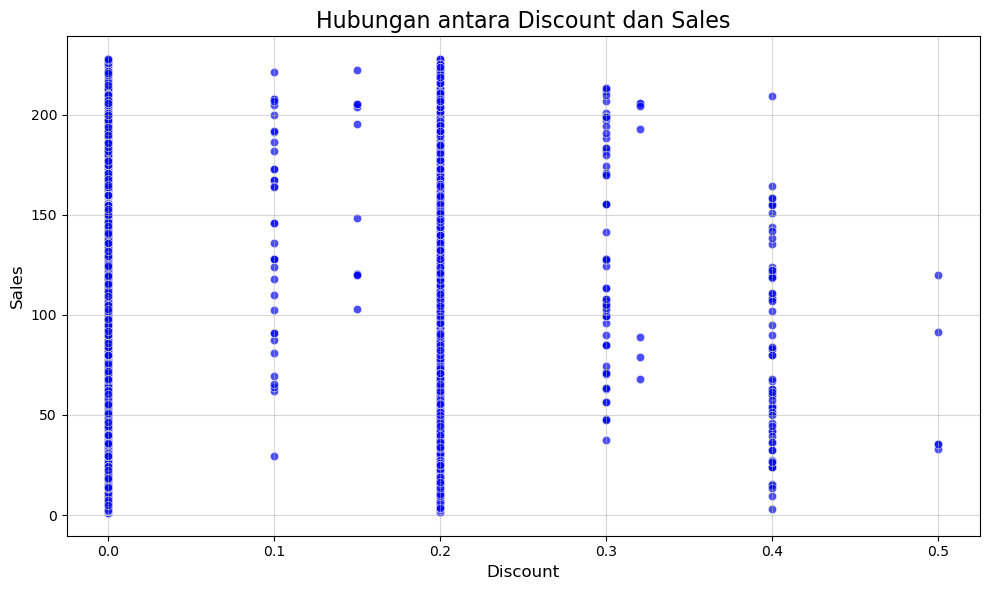

In [117]:
# 2. Scatter plot untuk hubungan Discount vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Sales', alpha=0.7, color='blue')
plt.title('Hubungan antara Discount dan Sales', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

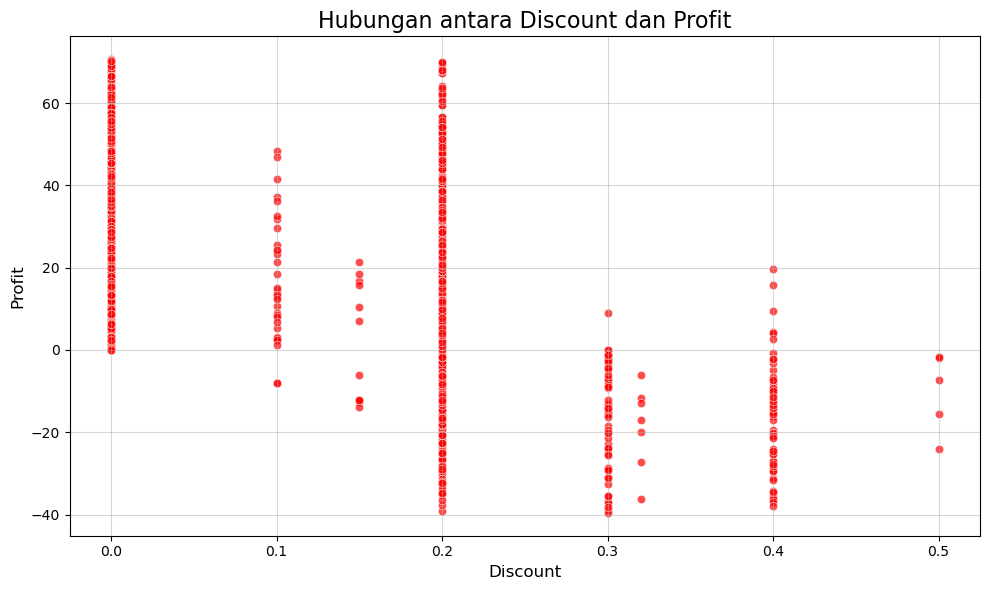

In [118]:
# 3. Scatter plot untuk hubungan Discount vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.7, color='red')
plt.title('Hubungan antara Discount dan Profit', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Analisis Waktu Musiman

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Persiapan Data
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Konversi ke datetime
df = df.set_index('Order Date')  # Set kolom 'Order Date' sebagai indeks
df = df.sort_index()  # Pastikan data diurutkan berdasarkan waktu

# Agregasi penjualan berdasarkan bulan
monthly_sales = df['Sales'].resample('M').sum()


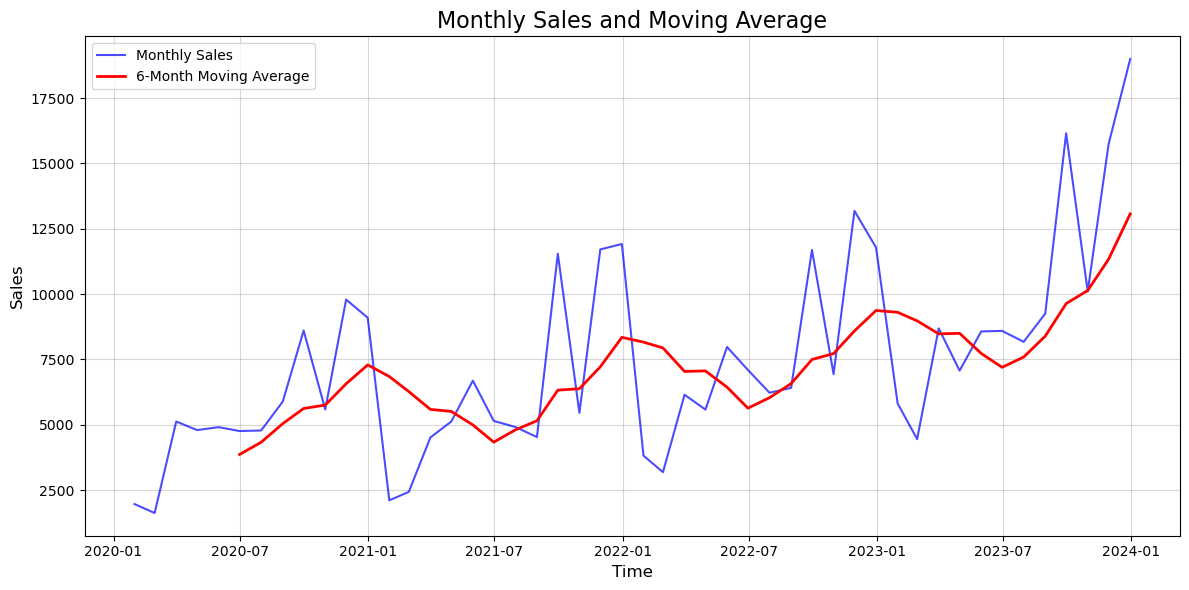

In [120]:
# 2. Moving Average
window_size = 6  # Ukuran jendela untuk moving average (6 bulan)
moving_avg = monthly_sales.rolling(window=window_size).mean()

# Plot data asli dan moving average
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales', color='blue', alpha=0.7)
plt.plot(moving_avg, label=f'{window_size}-Month Moving Average', color='red', linewidth=2)
plt.title('Monthly Sales and Moving Average', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_20656\966498607.py:6: UserWarning:

The figure layout has changed to tight



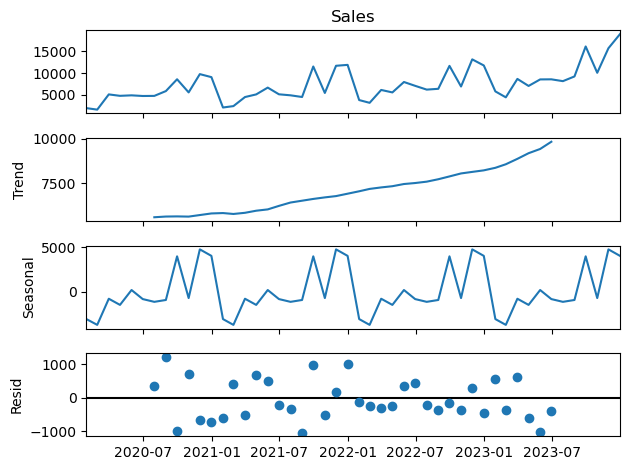

In [121]:
# 3. Decomposition Analysis
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)  # Periode 12 bulan (musiman tahunan)

# Plot komponen dekomposisi
decomposition.plot()
plt.tight_layout()
plt.show()